## Importing the required libraries :

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds

## Importing the dataset :

In [27]:
# Load the dataset
file_path = '/Users/sudebkumarmandal/Desktop/Movie Recommendations/Movies Recommendation.csv'
df = pd.read_csv(file_path)

In [28]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [29]:
# COLUMNS :

df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [30]:
# SIZE OF THE DATASET

df.shape

(4760, 21)

In [31]:
# DATA TYPES OF THE COLUMNS OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [32]:
df.describe

<bound method NDFrame.describe of       Movie_ID                  Movie_Title                       Movie_Genre  \
0            1                   Four Rooms                      Crime Comedy   
1            2                    Star Wars  Adventure Action Science Fiction   
2            3                 Finding Nemo                  Animation Family   
3            4                 Forrest Gump              Comedy Drama Romance   
4            5              American Beauty                             Drama   
...        ...                          ...                               ...   
4755      4784             Midnight Cabaret                            Horror   
4756      4785             Growing Up Smith               Comedy Family Drama   
4757      4786                       8 Days                    Thriller Drama   
4758      4787              Running Forever                            Family   
4759      4788  To Be Frank, Sinatra at 100                       Documenta

In [33]:
# Fill NaN values with empty strings for the combined features
df = df.fillna('')

In [34]:
# Simulate user ratings data using Movie_Vote as the rating
num_users = 100
num_movies = df.shape[0]

user_ids = np.arange(1, num_users + 1)
movie_ids = df['Movie_ID'].values

ratings_list = []

In [35]:
# Simulate ratings for each user
np.random.seed(42)
for user_id in user_ids:
    rated_movie_ids = np.random.choice(movie_ids, size=50, replace=False)
    for movie_id in rated_movie_ids:
        rating = df[df['Movie_ID'] == movie_id]['Movie_Vote'].values[0]
        ratings_list.append([user_id, movie_id, rating])

In [36]:
# Convert the list to a DataFrame
ratings_df = pd.DataFrame(ratings_list, columns=['userId', 'movieId', 'rating'])

In [37]:
ratings_df

,userId,movieId,rating
0,1,2315,4.4
1,1,316,6.3
2,1,2330,7.7
3,1,473,6.8
4,1,535,5.9
...,...,...,...
4995,100,3072,6.0
4996,100,4003,5.0
4997,100,1280,5.4
4998,100,2893,6.4


In [38]:
# Create the user-item matrix
user_movie_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

In [39]:
user_movie_matrix

movieId,1,3,4,7,8,9,12,13,14,15,...,4778,4779,4780,4781,4782,4783,4784,4786,4787,4788
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,7.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.4,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Convert to matrix format
user_movie_matrix = user_movie_matrix.values

In [41]:
user_movie_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
# Perform SVD
U, sigma, Vt = svds(user_movie_matrix, k=50)
sigma = np.diag(sigma)

In [43]:
sigma

array([[43.40111936,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 43.61670159,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 43.71009361, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 49.98281722,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.06356522,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 63.22118892]])

In [44]:
# Reconstruct the predicted ratings matrix
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [45]:
predicted_ratings

array([[ 0.37944383, -0.36134931,  0.70236444, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28505214,  0.27086666,  0.93431129, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14526529, -0.4390859 ,  0.23060733, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.35796403,  0.90934705, -0.63329904, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22325909,  0.00326084, -0.45865383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12429679, -0.4494294 , -0.03100038, ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
# Create a function to get movie recommendations for a user
def recommend_movies(user_id, num_recommendations=10):
    user_row_number = user_id - 1
    sorted_user_predictions = predicted_ratings[user_row_number].argsort()[::-1]
    user_data = ratings_df[ratings_df.userId == user_id]
    user_full = user_data.merge(df, how='left', left_on='movieId', right_on='Movie_ID').sort_values(['rating'], ascending=False)
    
    recommendations = df[~df['Movie_ID'].isin(user_full['movieId'])].iloc[sorted_user_predictions]
    return user_full, recommendations.head(num_recommendations)

In [47]:
# Example usage
user_id = 1
user_full, recommendations = recommend_movies(user_id=user_id, num_recommendations=10)

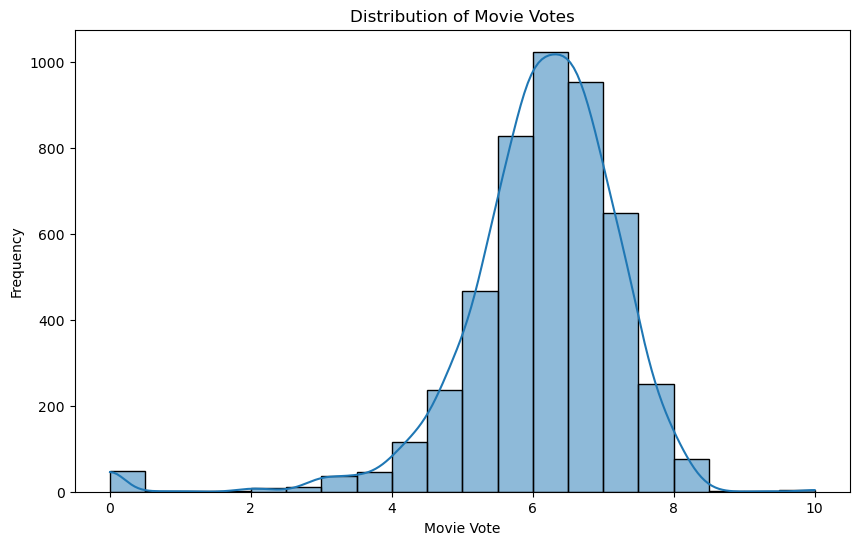

In [48]:
# Visualization of the distribution of movie votes
plt.figure(figsize=(10, 6))
sns.histplot(df['Movie_Vote'], bins=20, kde=True)
plt.title('Distribution of Movie Votes')
plt.xlabel('Movie Vote')
plt.ylabel('Frequency')
plt.show()

/var/folders/lw/9_gcjfzs13bbbm4k28hnvhz00000gn/T/ipykernel_57537/2528377586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='Movie_Title', data=user_full.head(10), palette='viridis')


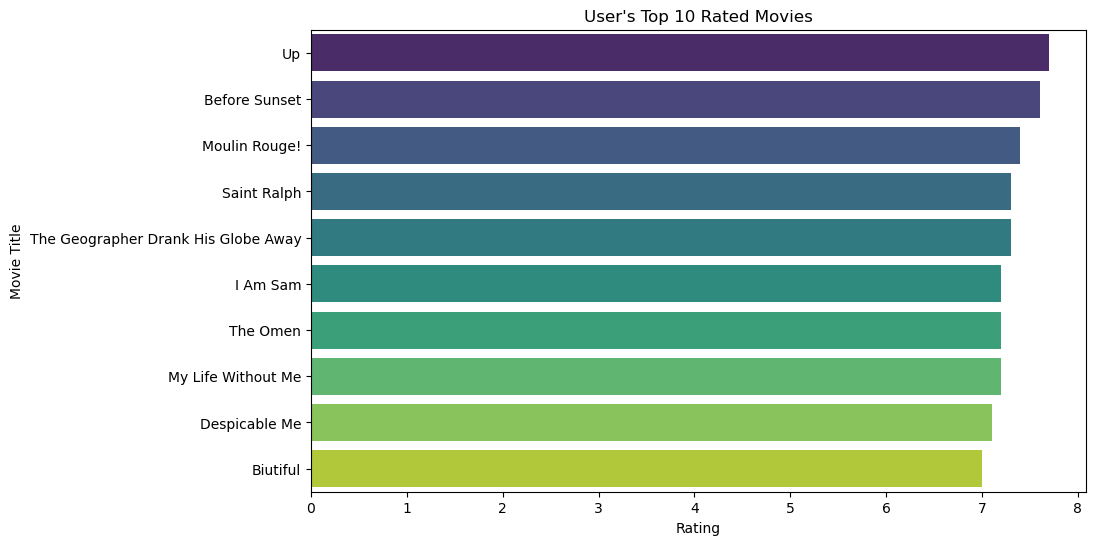

In [49]:
# Visualization of the user's rated movies and their ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='Movie_Title', data=user_full.head(10), palette='viridis')
plt.title("User's Top 10 Rated Movies")
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

/var/folders/lw/9_gcjfzs13bbbm4k28hnvhz00000gn/T/ipykernel_57537/3913488164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Movie_Vote', y='Movie_Title', data=recommendations, palette='viridis')


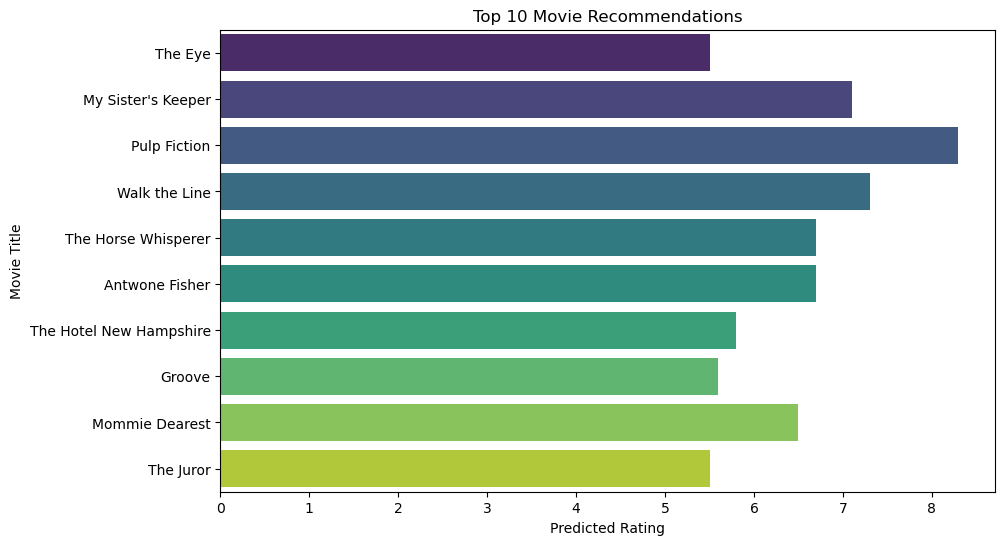

In [50]:
# Visualization of the top recommended movies for the user
plt.figure(figsize=(10, 6))
sns.barplot(x='Movie_Vote', y='Movie_Title', data=recommendations, palette='viridis')
plt.title('Top 10 Movie Recommendations')
plt.xlabel('Predicted Rating')
plt.ylabel('Movie Title')
plt.show()

In [51]:
print("User's rated movies:")
print(user_full[['Movie_Title', 'rating']])
print("\nRecommended movies:")
print(recommendations[['Movie_Title', 'Movie_Vote']])

User's rated movies:
                            Movie_Title  rating
2                                    Up     7.7
31                        Before Sunset     7.6
27                        Moulin Rouge!     7.4
35                          Saint Ralph     7.3
7   The Geographer Drank His Globe Away     7.3
20                             I Am Sam     7.2
41                             The Omen     7.2
16                   My Life Without Me     7.2
49                        Despicable Me     7.1
48                             Biutiful     7.0
24                           Salton Sea     7.0
10                              Carnage     7.0
47                          Rescue Dawn     6.9
44                      My All American     6.8
45                In the Company of Men     6.8
28                        Bottle Rocket     6.8
30              Glee: The Concert Movie     6.8
3                          The Fountain     6.8
13                               Closer     6.7
22                 